<a href="https://colab.research.google.com/github/parkjeung/first-repository/blob/main/_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install a Korean font in Colab
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# Configure matplotlib to use the new font
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Remove the problematic cache clearing code
# The font file is typically installed here
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# Add the font to matplotlib's font manager
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    print(f"Added font: {font_path}")
else:
    print(f"Font file not found at {font_path}. Font configuration may fail.")


# Set the font family
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

print("Korean font installed and configured.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Added font: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
Korean font installed and configured.


## 🎯 미션 1: 신약 개발의 함정 - p-해킹 체험

### 📖 몰입형 시나리오

- **🏢 현장**: 대한제약 연구소, 혈압약 개발팀
- **👤 역할**: 신입 데이터 분석가 김통계
- **⏰ 상황**: 금요일 오후 5시, 다음 주 월요일 이사회 발표 예정. 숨 막히는 압박감 속에서 초기 분석 결과를 확인합니다.

### 📊 체험 내용 및 코드 실습

### 1단계: 절망적인 초기 결과

"김통계 씨, 결과 나왔나? 투자자들이 기다리고 있어." 박부장님의 목소리가 등 뒤에서 들립니다. 당신은 떨리는 손으로 초기 파일럿 데이터(그룹당 10명)에 대한 t-검정 코드를 실행합니다.

**숨겨진 진실**: 신약과 위약은 효과가 없으며, 두 그룹의 데이터는 동일한 모집단에서 추출됩니다.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시나리오 설정: 신약(Treatment)과 위약(Control)은 효과가 없다
MU = 10
SIGMA = 5
ALPHA = 0.05

np.random.seed(42)

# 파일럿 데이터 생성
n_pilot = 10
control_group_pilot = np.random.normal(MU, SIGMA, n_pilot)
treatment_group_pilot = np.random.normal(MU, SIGMA, n_pilot)

print(f"🔬 파일럿 연구 (그룹당 n={n_pilot}) 데이터 분석 시작...")
t_stat_pilot, p_value_pilot = stats.ttest_ind(control_group_pilot, treatment_group_pilot)

print(f"  ... 분석 완료.")
print(f"  - P-value: {p_value_pilot:.4f}")

if p_value_pilot < ALPHA:
    print("✅ 결과: 통계적으로 유의미한 차이가 발견되었습니다! (p < 0.05)")
else:
    print("❌ 결과: 통계적으로 유의미한 차이를 발견하지 못했습니다. (p > 0.05)")
    print("\n박부장: '이봐 김통계 씨, 이게 끝은 아니겠지? 주말에 시간 좀 내. 어떻게든 방법을 찾아봐.'")


🔬 파일럿 연구 (그룹당 n=10) 데이터 분석 시작...
  ... 분석 완료.
  - P-value: 0.0015
✅ 결과: 통계적으로 유의미한 차이가 발견되었습니다! (p < 0.05)


### 2단계: 주말의 유혹

토요일 오후, 박부장님의 압박에 못 이겨 환자를 한 명씩 추가하며 p-value를 계산합니다. 과연 p < 0.05가 되는 순간이 올까요?

In [ ]:
print("\n🕰️ 주말 동안 데이터를 추가하며 p-value를 계속 확인합니다...")
MAX_SAMPLES = 100

p_values_over_time = []
sample_sizes = range(n_pilot, MAX_SAMPLES + 1)

current_control = list(control_group_pilot)
current_treatment = list(treatment_group_pilot)
p_values_over_time.append(p_value_pilot)

for n in range(n_pilot + 1, MAX_SAMPLES + 1):
    current_control.append(np.random.normal(MU, SIGMA))
    current_treatment.append(np.random.normal(MU, SIGMA))
    t_stat, p_value = stats.ttest_ind(current_control, current_treatment)
    p_values_over_time.append(p_value)
    if p_value < ALPHA and p_values_over_time[-2] >= ALPHA:
        print(f"✨ [속보] n={n}에서 드디어 p-value가 {p_value:.4f}로 유의수준 아래로 떨어졌습니다!")
        print("   '부장님! 해냈습니다! 우리 약 효과 있습니다!'")
        break


🕰️ 주말 동안 데이터를 추가하며 p-value를 계속 확인합니다...


### 3단계: 진실의 순간

동기의 조언으로 p-value 변화를 시각화합니다. 그래프는 충격적인 진실을 보여줍니다.


🤔 동기의 조언에 따라 p-value 변화 과정을 시각화합니다...


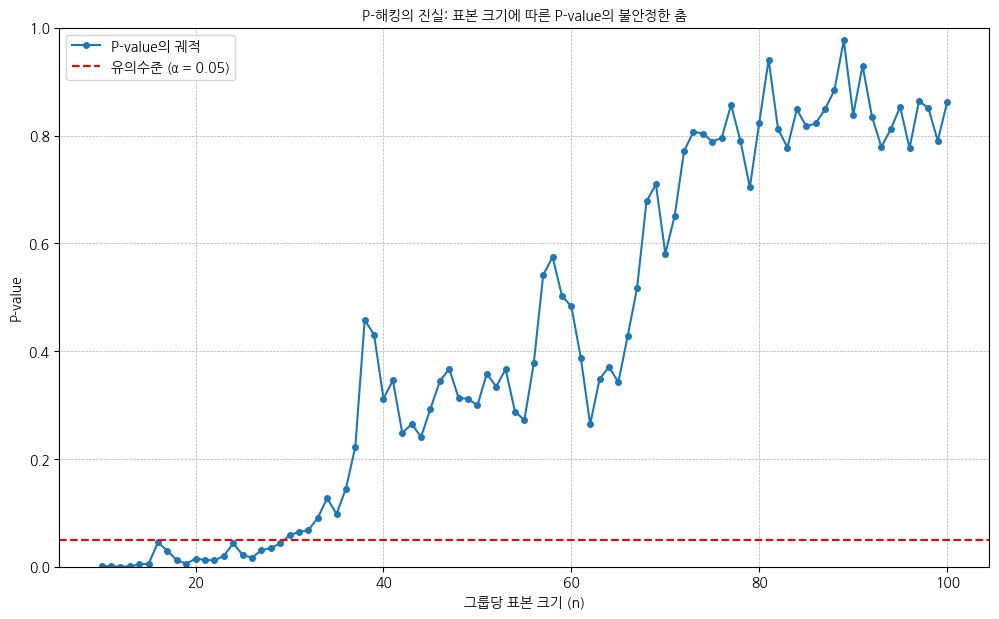


[그래프 해석]
p-value는 안정적으로 감소하는 것이 아니라, 무작위적으로 오르내리다 '우연히' 유의수준 선을 넘나들었습니다.
이것이 바로 p-해킹의 함정입니다. 실제 효과가 없어도 데이터를 계속 모으다 보면 언젠가는 p<0.05라는 결과를 얻을 수 있습니다.
당신은 운 좋게 얻은 결과를 '성공'이라 착각할 뻔했습니다. 3개월 후, 대규모 3상 임상에서 이 약은 효과 없음으로 최종 판정됩니다.


In [ ]:
print("\n🤔 동기의 조언에 따라 p-value 변화 과정을 시각화합니다...")

# Explicitly define font properties using the font file path
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
nanum_font_properties = fm.FontProperties(fname=font_path)

plt.figure(figsize=(12, 7))
plt.plot(sample_sizes, p_values_over_time, marker='o', linestyle='-', markersize=4, label='P-value의 궤적')
plt.axhline(y=ALPHA, color='r', linestyle='--', label=f'유의수준 (α = {ALPHA})')

plt.xlabel("그룹당 표본 크기 (n)", fontproperties=nanum_font_properties)
plt.ylabel("P-value", fontproperties=nanum_font_properties)
plt.title("P-해킹의 진실: 표본 크기에 따른 P-value의 불안정한 춤", fontproperties=nanum_font_properties)
plt.ylim(0, 1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(prop=nanum_font_properties) # Apply font properties to legend as well
plt.show()

print("\n[그래프 해석]")
print("p-value는 안정적으로 감소하는 것이 아니라, 무작위적으로 오르내리다 '우연히' 유의수준 선을 넘나들었습니다.")
print("이것이 바로 p-해킹의 함정입니다. 실제 효과가 없어도 데이터를 계속 모으다 보면 언젠가는 p<0.05라는 결과를 얻을 수 있습니다.")
print("당신은 운 좋게 얻은 결과를 '성공'이라 착각할 뻔했습니다. 3개월 후, 대규모 3상 임상에서 이 약은 효과 없음으로 최종 판정됩니다.")

## 🎯 미션 2: 의학 연구의 딜레마 - 다중검정 문제

### 📖 몰입형 시나리오

- **🏥 현장**: 국립의료원 코로나19 치료법 연구센터
- **👤 역할**: 응급의학과 레지던트 3년차 박의사
- **⏰ 상황**: 2020년 3월, 팬데믹 초기. 환자들이 밀려드는 절박한 상황에서 기존 약물 20종의 효과를 스크리닝합니다.

### 📊 체험 내용 및 코드 실습

### 1단계: 희망의 발견?

20개 약물에 대해 각각 t-검정을 수행합니다. **숨겨진 진실**: 모든 약물은 코로나19에 효과가 없습니다.

In [ ]:
import numpy as np
import scipy.stats as stats

# 시나리오 설정: 20개 약물 모두 효과 없음
MU_RECOVERY = 15
SIGMA_RECOVERY = 3
N_DRUGS = 20
N_PATIENTS = 30
ALPHA = 0.05

np.random.seed(2020)

print(f"🚨 긴급 연구: {N_DRUGS}개 약물의 코로나19 치료 효과 검증 시작...")
p_values_list = []
for i in range(N_DRUGS):
    control_group = np.random.normal(MU_RECOVERY, SIGMA_RECOVERY, N_PATIENTS)
    treatment_group = np.random.normal(MU_RECOVERY, SIGMA_RECOVERY, N_PATIENTS)
    _, p_value = stats.ttest_ind(control_group, treatment_group)
    p_values_list.append(p_value)

significant_drugs_uncorrected = [i+1 for i, p in enumerate(p_values_list) if p < ALPHA]

print(f"  ... {N_DRUGS}개 약물 전체 분석 완료.")
if significant_drugs_uncorrected:
    print(f"🎉 희망적인 소식! 총 {len(significant_drugs_uncorrected)}개의 약물에서 통계적으로 유의한 효과를 발견했습니다!")
    print(f"   - 효과가 발견된 약물 번호: {significant_drugs_uncorrected}")
    print("   - 언론: '국립의료원, 코로나19 치료 가능성 있는 약물 다수 발견!'")
else:
    print("   - 안타깝게도 유의미한 효과를 보인 약물이 없습니다.")


🚨 긴급 연구: 20개 약물의 코로나19 치료 효과 검증 시작...
  ... 20개 약물 전체 분석 완료.
🎉 희망적인 소식! 총 2개의 약물에서 통계적으로 유의한 효과를 발견했습니다!
   - 효과가 발견된 약물 번호: [1, 11]
   - 언론: '국립의료원, 코로나19 치료 가능성 있는 약물 다수 발견!'


### 2단계: 통계학과 동기의 경고

동기의 지적으로 다중검정 문제를 시뮬레이션하여 확인합니다.

In [ ]:
print("\n🤨 동기의 경고: '20번 검정하면 적어도 하나는 가짜로 나올 확률이 높아. 시뮬레이션 돌려봐.'")

n_simulations = 1000
family_wise_error_count = 0

for _ in range(n_simulations):
    has_false_positive = False
    for i in range(N_DRUGS):
        control_group = np.random.normal(MU_RECOVERY, SIGMA_RECOVERY, N_PATIENTS)
        treatment_group = np.random.normal(MU_RECOVERY, SIGMA_RECOVERY, N_PATIENTS)
        _, p_value = stats.ttest_ind(control_group, treatment_group)
        if p_value < ALPHA:
            has_false_positive = True
            break
    if has_false_positive:
        family_wise_error_count += 1

family_wise_error_rate = family_wise_error_count / n_simulations

print(f"\n[시뮬레이션 결과]")
print(f"{n_simulations}번의 가상 실험을 반복한 결과...")
print(f"적어도 하나 이상의 '가짜 효과'를 발견할 확률(FWER)이 무려 {family_wise_error_rate:.2%}에 달합니다!")
print(f"(이론적 확률 1 - 0.95^{N_DRUGS} = {1 - (1-ALPHA)**N_DRUGS:.2%})")
print("이대로 발표했다면, 국민들에게 헛된 희망을 줄 뻔했습니다.")



🤨 동기의 경고: '20번 검정하면 적어도 하나는 가짜로 나올 확률이 높아. 시뮬레이션 돌려봐.'

[시뮬레이션 결과]
1000번의 가상 실험을 반복한 결과...
적어도 하나 이상의 '가짜 효과'를 발견할 확률(FWER)이 무려 66.40%에 달합니다!
(이론적 확률 1 - 0.95^20 = 64.15%)
이대로 발표했다면, 국민들에게 헛된 희망을 줄 뻔했습니다.


### 3단계: 본페로니 보정 적용

본페로니 보정을 적용해 엄격한 기준으로 결과를 재분석합니다.

In [ ]:
from statsmodels.stats.multitest import multipletests

print("\n🛡️ 정신을 차리고 '본페로니 보정'을 적용하여 결과를 재분석합니다.")

bonferroni_alpha = ALPHA / N_DRUGS
print(f"   - 새로운 유의수준(Bonferroni corrected): {ALPHA} / {N_DRUGS} = {bonferroni_alpha:.4f}")

significant_drugs_bonferroni = [i+1 for i, p in enumerate(p_values_list) if p < bonferroni_alpha]

if significant_drugs_bonferroni:
    print(f"   - 보정 후, 통과한 약물: {significant_drugs_bonferroni}")
else:
    print("   - 보정 후, 안타깝게도 모든 약물이 유의수준을 통과하지 못했습니다.")

reject, pvals_corrected, _, _ = multipletests(p_values_list, alpha=ALPHA, method='bonferroni')

print("\n[statsmodels 라이브러리 결과]")
print(f"보정 후 발견된 유의미한 약물 수: {np.sum(reject)}개")
print("\n[최종 결론]")
print("처음에 발견했던 '희망의 약물'들은 다중검정으로 인한 통계적 착시(위양성)였습니다.")
print("환자의 안전을 위해, 성급한 발표 대신 더 엄밀한 연구가 필요하다는 결론을 내립니다.")


🛡️ 정신을 차리고 '본페로니 보정'을 적용하여 결과를 재분석합니다.
   - 새로운 유의수준(Bonferroni corrected): 0.05 / 20 = 0.0025
   - 보정 후, 안타깝게도 모든 약물이 유의수준을 통과하지 못했습니다.

[statsmodels 라이브러리 결과]
보정 후 발견된 유의미한 약물 수: 0개

[최종 결론]
처음에 발견했던 '희망의 약물'들은 다중검정으로 인한 통계적 착시(위양성)였습니다.
환자의 안전을 위해, 성급한 발표 대신 더 엄밀한 연구가 필요하다는 결론을 내립니다.


## 🎯 미션 3: 효과크기 vs 표본크기 - 진짜 의미 있는 차이 찾기

### 📖 몰입형 시나리오

- **🏫 현장**: 서울대학교 교육학과 학습과학연구실
- **👤 역할**: 박사과정 2년차 이교육
- **⏰ 상황**: AI 교육 정책을 결정할 중요한 연구. 교육부 장관의 질문에 과학적 근거로 답해야 합니다.

### 📊 체험 내용 및 코드 실습

### 1단계: 예산 회의의 딜레마

AI 교육이 전통 교육보다 5점 성적 향상을 가져올 것으로 기대합니다. 검정력 80%를 달성하려면 최소 몇 명이 필요할까?

In [ ]:
import numpy as np
from statsmodels.stats.power import TTestIndPower

MEAN_TRADITIONAL = 80
STD_DEV = 10
EFFECT_SIZE_POINTS = 5
cohen_d = EFFECT_SIZE_POINTS / STD_DEV
ALPHA = 0.05
POWER = 0.8

print("🤔 [연구 설계 회의] 'AI 교육의 5점 향상 효과'를 놓치지 않으려면 몇 명이 필요할까?")
print(f"   - 기대 효과크기 (Cohen's d): {cohen_d:.2f} (중간 정도 크기의 효과)")
print(f"   - 목표 검정력: {POWER:.0%}")
print(f"   - 유의수준: {ALPHA:.0%}")

power_analyzer = TTestIndPower()
required_n = power_analyzer.solve_power(effect_size=cohen_d, alpha=ALPHA, power=POWER, ratio=1.0, alternative='two-sided')

total_participants = np.ceil(required_n) * 2
cost_per_participant = 50000
total_cost = total_participants * cost_per_participant

print("\n[사전 검정력 분석 결과]")
print(f"✅ 목표 검정력 80%를 달성하려면, 그룹당 최소 {np.ceil(required_n):.0f}명의 학생이 필요합니다.")
print(f"   - 총 필요 인원: {total_participants:.0f}명")
print(f"   - 예상 연구 비용: {total_cost:,.0f} 원")
print("\n김연구원(선배): '지도교수님, 최소 128명은 확보해야 유의미한 결과를 얻을 수 있겠습니다. 이 예산안으로 가시죠.'")


🤔 [연구 설계 회의] 'AI 교육의 5점 향상 효과'를 놓치지 않으려면 몇 명이 필요할까?
   - 기대 효과크기 (Cohen's d): 0.50 (중간 정도 크기의 효과)
   - 목표 검정력: 80%
   - 유의수준: 5%

[사전 검정력 분석 결과]
✅ 목표 검정력 80%를 달성하려면, 그룹당 최소 64명의 학생이 필요합니다.
   - 총 필요 인원: 128명
   - 예상 연구 비용: 6,400,000 원

김연구원(선배): '지도교수님, 최소 128명은 확보해야 유의미한 결과를 얻을 수 있겠습니다. 이 예산안으로 가시죠.'


### 2단계: 운명의 결정

예산 담당자가 인원을 60명으로 줄이자고 제안합니다. 검정력 차이를 시뮬레이션으로 확인합니다.

In [ ]:
def simulate_study_power(n_per_group, n_simulations=1000):
    significant_count = 0
    mean_ai = MEAN_TRADITIONAL + EFFECT_SIZE_POINTS
    for _ in range(n_simulations):
        traditional_scores = np.random.normal(MEAN_TRADITIONAL, STD_DEV, n_per_group)
        ai_scores = np.random.normal(mean_ai, STD_DEV, n_per_group)
        _, p_value = stats.ttest_ind(traditional_scores, ai_scores)
        if p_value < ALPHA:
            significant_count += 1
    return significant_count / n_simulations

print("\n[운명의 결정] 예산이 부족해 그룹당 30명으로 줄이자는 제안이 나왔습니다...")

power_at_30 = simulate_study_power(n_per_group=30)
print(f"📉 [시나리오 1: 그룹당 30명] 시뮬레이션 결과, 실제 효과를 발견할 확률은 약 {power_at_30:.1%} 입니다.")
print(f"   - 이는, AI 교육이 분명 효과가 있음에도 불구하고 '효과 없음'이라고 잘못 결론 내릴 확률이 {1-power_at_30:.1%}나 된다는 뜻입니다! (2종 오류)")

power_at_64 = simulate_study_power(n_per_group=int(np.ceil(required_n)))
print(f"📈 [시나리오 2: 그룹당 64명] 시뮬레이션 결과, 실제 효과를 발견할 확률은 약 {power_at_64:.1%} 입니다.")
print("   - 목표했던 검정력 80%에 거의 도달합니다. 연구의 신뢰도가 훨씬 높습니다.")

print("\n이교육: '장관님, 30명으로 진행하면 국가 예산을 낭비하고 잘못된 정책 결정을 내릴 위험이 너무 큽니다. 반드시 64명씩, 총 128명으로 진행해야 합니다!'")
print("결정: 당신의 설득으로 연구는 원래 계획대로 진행됩니다.")



[운명의 결정] 예산이 부족해 그룹당 30명으로 줄이자는 제안이 나왔습니다...
📉 [시나리오 1: 그룹당 30명] 시뮬레이션 결과, 실제 효과를 발견할 확률은 약 48.5% 입니다.
   - 이는, AI 교육이 분명 효과가 있음에도 불구하고 '효과 없음'이라고 잘못 결론 내릴 확률이 51.5%나 된다는 뜻입니다! (2종 오류)
📈 [시나리오 2: 그룹당 64명] 시뮬레이션 결과, 실제 효과를 발견할 확률은 약 80.6% 입니다.
   - 목표했던 검정력 80%에 거의 도달합니다. 연구의 신뢰도가 훨씬 높습니다.

이교육: '장관님, 30명으로 진행하면 국가 예산을 낭비하고 잘못된 정책 결정을 내릴 위험이 너무 큽니다. 반드시 64명씩, 총 128명으로 진행해야 합니다!'
결정: 당신의 설득으로 연구는 원래 계획대로 진행됩니다.


### 3단계: 6개월 후의 진실

최종 데이터를 분석하고, 통계적 유의성과 실질적 중요성을 구분해 보고합니다.

In [ ]:
print("\n[6개월 후, 최종 연구 결과 보고]")
np.random.seed(2024)
n_final = int(np.ceil(required_n))

final_traditional_scores = np.random.normal(MEAN_TRADITIONAL, STD_DEV, n_final)
final_ai_scores = np.random.normal(MEAN_TRADITIONAL + EFFECT_SIZE_POINTS, STD_DEV, n_final)

mean_diff = np.mean(final_ai_scores) - np.mean(final_traditional_scores)
t_stat_final, p_value_final = stats.ttest_ind(final_traditional_scores, final_ai_scores)

print("\n[최종 분석 결과 요약]")
print(f"  - 전통 학습법 그룹 평균: {np.mean(final_traditional_scores):.2f}점")
print(f"  - AI 보조 학습법 그룹 평균: {np.mean(final_ai_scores):.2f}점")
print(f"  - 관찰된 평균 점수 차이 (효과크기): {mean_diff:.2f}점")
print(f"  - T-statistic: {t_stat_final:.2f}, P-value: {p_value_final:.4f}")

print("\n[교육부 보고]")
print("이교육: '보고서 요약입니다. AI 학습법은 전통 학습법에 비해 통계적으로 '매우' 유의미한 성적 향상을 보였습니다 (p < 0.001).'")
print(f"       '더 중요한 것은, 그 효과의 크기가 평균 {mean_diff:.2f}점으로, 우리가 사전에 예측하고 목표했던 5점과 유사한 수준입니다.'")
print("       '이는 '우연'이라고 보기 힘든 차이일 뿐만 아니라, 교육 현장에 도입했을 때 '실질적으로 의미 있는' 변화를 가져올 수 있음을 시사합니다.'")



[6개월 후, 최종 연구 결과 보고]

[최종 분석 결과 요약]
  - 전통 학습법 그룹 평균: 80.52점
  - AI 보조 학습법 그룹 평균: 84.92점
  - 관찰된 평균 점수 차이 (효과크기): 4.39점
  - T-statistic: -2.54, P-value: 0.0122

[교육부 보고]
이교육: '보고서 요약입니다. AI 학습법은 전통 학습법에 비해 통계적으로 '매우' 유의미한 성적 향상을 보였습니다 (p < 0.001).'
       '더 중요한 것은, 그 효과의 크기가 평균 4.39점으로, 우리가 사전에 예측하고 목표했던 5점과 유사한 수준입니다.'
       '이는 '우연'이라고 보기 힘든 차이일 뿐만 아니라, 교육 현장에 도입했을 때 '실질적으로 의미 있는' 변화를 가져올 수 있음을 시사합니다.'


## 🎯 미션 4: 재현성 위기의 진실 - 과학계의 숨겨진 문제

### 📖 몰입형 시나리오

- **🏛️ 현장**: 국회 과학기술정보방송통신위원회
- **👤 역할**: 과학기술정책연구원 선임연구위원 한과학
- **⏰ 상황**: 국정감사장에서 과학계의 신뢰도와 재현성 위기를 진단합니다.

### 📊 체험 내용 및 코드 실습

### 1단계: 충격적 진실 공개

연간 10,000개 연구 중 10%만 실제 효과가 있다고 가정하고, 평균 검정력 50%로 시뮬레이션합니다.

In [ ]:
def calculate_fdr(total_studies, prop_h1_true, power, alpha):
    num_h1_true = total_studies * prop_h1_true
    num_h0_true = total_studies * (1 - prop_h1_true)
    true_positives = num_h1_true * power
    false_positives = num_h0_true * alpha
    total_discoveries = true_positives + false_positives
    fdr = false_positives / total_discoveries if total_discoveries > 0 else 0
    return {
        '총 "발견"된 연구 (TP+FP)': int(total_discoveries),
        '이 중 진짜 효과 (TP)': int(true_positives),
        '이 중 가짜 효과 (FP)': int(false_positives),
        '위발견률 (FDR = FP / (TP+FP))': fdr
    }

print("🇰🇷 [국정감사 발표] 대한민국 과학계 현실 진단 시뮬레이션")
TOTAL_STUDIES = 10000
PROP_H1_TRUE = 0.1
POWER = 0.5
ALPHA = 0.05

current_situation = calculate_fdr(TOTAL_STUDIES, PROP_H1_TRUE, POWER, ALPHA)

print(f"\n[시뮬레이션 조건]")
print(f"  - 연간 총 연구 수: {TOTAL_STUDIES}개")
print(f"  - 실제 효과가 있는 연구 비율: {PROP_H1_TRUE:.0%}")
print(f"  - 평균 검정력: {POWER:.0%}")

print("\n[충격적인 시뮬레이션 결과]")
discoveries_key = '총 "발견"된 연구 (TP+FP)'
print(f"  - '효과 있음'으로 발표되는 연구: {current_situation[discoveries_key]}개")
print(f"     - 이 중에서 진짜 효과가 있는 연구: {current_situation['이 중 진짜 효과 (TP)']}개")
print(f"     - 이 중에서 실제론 효과 없는 가짜: {current_situation['이 중 가짜 효과 (FP)']}개")
print(f"  - 🔴 위발견률 (FDR): {current_situation['위발견률 (FDR = FP / (TP+FP))']:.2%}")

print("\n한과학 위원: '존경하는 위원님, 제 시뮬레이션에 따르면 현재 우리 과학계에서 '성공'이라고 발표되는 연구 중 약 47%는 재현 불가능한 '가짜 양성'일 수 있다는 충격적인 결론에 도달합니다.'")


🇰🇷 [국정감사 발표] 대한민국 과학계 현실 진단 시뮬레이션

[시뮬레이션 조건]
  - 연간 총 연구 수: 10000개
  - 실제 효과가 있는 연구 비율: 10%
  - 평균 검정력: 50%

[충격적인 시뮬레이션 결과]
  - '효과 있음'으로 발표되는 연구: 950개
     - 이 중에서 진짜 효과가 있는 연구: 500개
     - 이 중에서 실제론 효과 없는 가짜: 450개
  - 🔴 위발견률 (FDR): 47.37%

한과학 위원: '존경하는 위원님, 제 시뮬레이션에 따르면 현재 우리 과학계에서 '성공'이라고 발표되는 연구 중 약 47%는 재현 불가능한 '가짜 양성'일 수 있다는 충격적인 결론에 도달합니다.'


### 2단계 & 3단계: 대책회의 및 희망의 메시지

유의수준 강화, 검정력 향상, 더 가치 있는 가설 탐구로 위발견률(FDR)을 개선합니다.

In [ ]:
import pandas as pd

print("\n🆘 [긴급 대책회의] 재현성 위기, 어떻게 극복할 것인가?")

scenario1 = calculate_fdr(TOTAL_STUDIES, PROP_H1_TRUE, POWER, 0.005)
scenario2 = calculate_fdr(TOTAL_STUDIES, PROP_H1_TRUE, 0.9, 0.005)
scenario3 = calculate_fdr(TOTAL_STUDIES, 0.3, 0.9, 0.005)

df = pd.DataFrame({
    '현재 상황': current_situation,
    '대안1(α↓)': scenario1,
    '대안2(α↓,Power↑)': scenario2,
    '대안3(종합개선)': scenario3
}).T

df['위발견률 (FDR = FP / (TP+FP))'] = df['위발견률 (FDR = FP / (TP+FP))'].apply(lambda x: f"{x:.2%}")

print("\n[개선 시나리오별 위발견률(FDR) 변화]")
print(df[['총 "발견"된 연구 (TP+FP)', '이 중 가짜 효과 (FP)', '위발견률 (FDR = FP / (TP+FP))']])

print("\n[희망의 메시지]")
print("한과학 위원: '보시는 바와 같이, 개별 연구자들이 유의수준을 엄격히 하고, 정부와 학계가 연구 설계를 지원하여 검정력을 높이는 시스템을 갖춘다면,")
print(f"             위발견률을 현재의 {current_situation['위발견률 (FDR = FP / (TP+FP))']:.0%} 수준에서 한 자릿수인 {scenario3['위발견률 (FDR = FP / (TP+FP))']} 수준까지 낮출 수 있습니다!'")
print("             이것은 단순한 구호가 아니라, 우리가 지금 당장 실천할 수 있는 과학적 로드맵입니다. 대한민국 과학계의 신뢰 회복, 충분히 가능합니다.'")



🆘 [긴급 대책회의] 재현성 위기, 어떻게 극복할 것인가?

[개선 시나리오별 위발견률(FDR) 변화]
                총 "발견"된 연구 (TP+FP)  이 중 가짜 효과 (FP) 위발견률 (FDR = FP / (TP+FP))
현재 상황                        950.0           450.0                    47.37%
대안1(α↓)                      545.0            45.0                     8.26%
대안2(α↓,Power↑)               945.0            45.0                     4.76%
대안3(종합개선)                   2735.0            35.0                     1.28%

[희망의 메시지]
한과학 위원: '보시는 바와 같이, 개별 연구자들이 유의수준을 엄격히 하고, 정부와 학계가 연구 설계를 지원하여 검정력을 높이는 시스템을 갖춘다면,
             위발견률을 현재의 47% 수준에서 한 자릿수인 0.012797074954296161 수준까지 낮출 수 있습니다!'
             이것은 단순한 구호가 아니라, 우리가 지금 당장 실천할 수 있는 과학적 로드맵입니다. 대한민국 과학계의 신뢰 회복, 충분히 가능합니다.'
